# 10.6 Precision Recall Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 将十分类问题转化为二分类问题
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 10.6.1 Precision/Recall 与 threshold之间的关系

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))
    

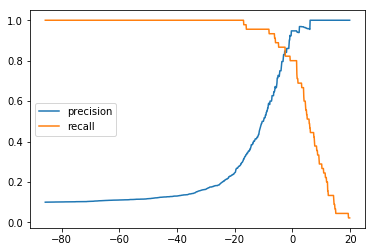

In [5]:
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.legend()
plt.show()

## 10.6.2 Precision-Recall曲线
- Precision-Recall曲线急剧下降的开始的点是Precision-Recall比较平衡的点，可作为阈值

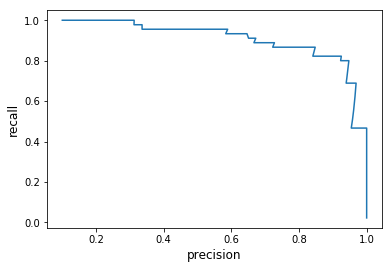

In [6]:
plt.plot(precisions, recalls)
plt.xlabel("precision",fontsize = 12)
plt.ylabel("recall",fontsize = 12)
plt.show()

## 10.6.2 Scikit-learn中的Precision-Recall曲线
- thresholds 要少一个值
- 因为最后一个precision和recall分别是1.和0.，这时是没有对于的threshold
    - precision_recall_curve并没有从最小值开始，而是自动寻找了它认为的最重要的数据

In [7]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [8]:
precisions.shape

(145,)

In [9]:
recalls.shape

(145,)

In [10]:
thresholds.shape

(144,)

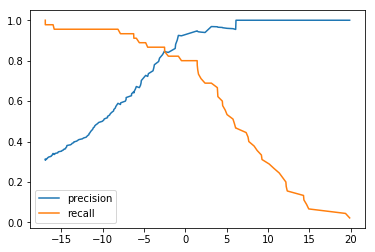

In [11]:
plt.plot(thresholds, precisions[:-1], label='precision')
plt.plot(thresholds, recalls[:-1], label='recall')
plt.legend()
plt.show()

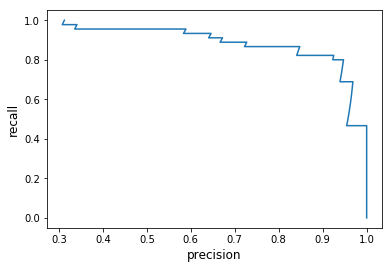

In [12]:
plt.plot(precisions, recalls)
plt.xlabel("precision",fontsize = 12)
plt.ylabel("recall",fontsize = 12)
plt.show()